In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Maychall_diabetes_clinic.csv to Maychall_diabetes_clinic.csv


In [ ]:
df = pd.read_csv('Maychall_diabetes_clinic.csv')

In [ ]:
df.head()

,Age,BMI,Glucose,BloodPressure,Insulin,SkinThickness,DiabetesPedigreeFunction,Pregnancies,HbA1c,WaistCircumference,PhysicalActivityLevel,SmokingStatus,AlcoholConsumption,DietQuality,FamilyHistoryOfDiabetes,Outcome
0,21,27.042868,115.044051,72.312540,166.554061,14.512508,0.343998,4,4.609192,87.433711,Moderate,Former,Occasional,Poor,No,0
1,79,28.136452,131.481070,74.241633,117.240917,11.412407,0.317195,2,5.625849,97.376022,Active,Current,Regular,Healthy,Yes,1
2,59,30.925132,70.000000,78.626280,5.518227,18.948319,0.100000,2,6.897712,99.255427,Sedentary,Current,Occasional,Healthy,Yes,1
3,28,29.612867,94.747839,75.572621,76.167955,12.089261,0.199144,2,5.633548,133.914679,Sedentary,Former,Occasional,Poor,Yes,0
4,45,27.206978,112.748705,79.981362,74.263685,7.742520,0.140141,3,6.571703,100.665152,Sedentary,Never,Occasional,Average,Yes,1


In [ ]:
df.shape

(2525, 16)

In [ ]:
df.isnull().sum()

,0
Age,0
BMI,127
Glucose,125
BloodPressure,127
Insulin,127
SkinThickness,0
DiabetesPedigreeFunction,0
Pregnancies,0
HbA1c,127
WaistCircumference,0


### Handling Missing Data

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['PhysicalActivityLevel', 'SmokingStatus', 'AlcoholConsumption',
       'DietQuality', 'FamilyHistoryOfDiabetes'],
      dtype='object')

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Age', 'BMI', 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness',
       'DiabetesPedigreeFunction', 'Pregnancies', 'HbA1c',
       'WaistCircumference', 'Outcome'],
      dtype='object')

In [ ]:
median_value = df[num_cols].median()
median_value

,0
Age,50.000000
BMI,28.136452
Glucose,120.913601
BloodPressure,75.382399
Insulin,88.641939
SkinThickness,19.961804
DiabetesPedigreeFunction,0.264686
Pregnancies,2.000000
HbA1c,5.855495
WaistCircumference,90.049286


In [ ]:
df[num_cols] = df[num_cols].fillna(median_value)

In [ ]:
df.isnull().sum()

,0
Age,0
BMI,0
Glucose,0
BloodPressure,0
Insulin,0
SkinThickness,0
DiabetesPedigreeFunction,0
Pregnancies,0
HbA1c,0
WaistCircumference,0


In [ ]:
mode = df["AlcoholConsumption"].mode()

In [ ]:
df["AlcoholConsumption"] = df["AlcoholConsumption"].fillna(mode[0])

In [ ]:
df["AlcoholConsumption"]

,AlcoholConsumption
0,Occasional
1,Regular
2,Occasional
3,Occasional
4,Occasional
...,...
2520,Occasional
2521,Occasional
2522,Occasional
2523,Regular


In [ ]:
df.isnull().sum()

,0
Age,0
BMI,0
Glucose,0
BloodPressure,0
Insulin,0
SkinThickness,0
DiabetesPedigreeFunction,0
Pregnancies,0
HbA1c,0
WaistCircumference,0


In [ ]:
df.duplicated().sum()

np.int64(25)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
len(num_cols)

11

In [ ]:
num_cols = ['Age', 'BMI', 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness','DiabetesPedigreeFunction', 'Pregnancies', 'HbA1c','WaistCircumference', 'Outcome']

In [ ]:
## Checking for outliers

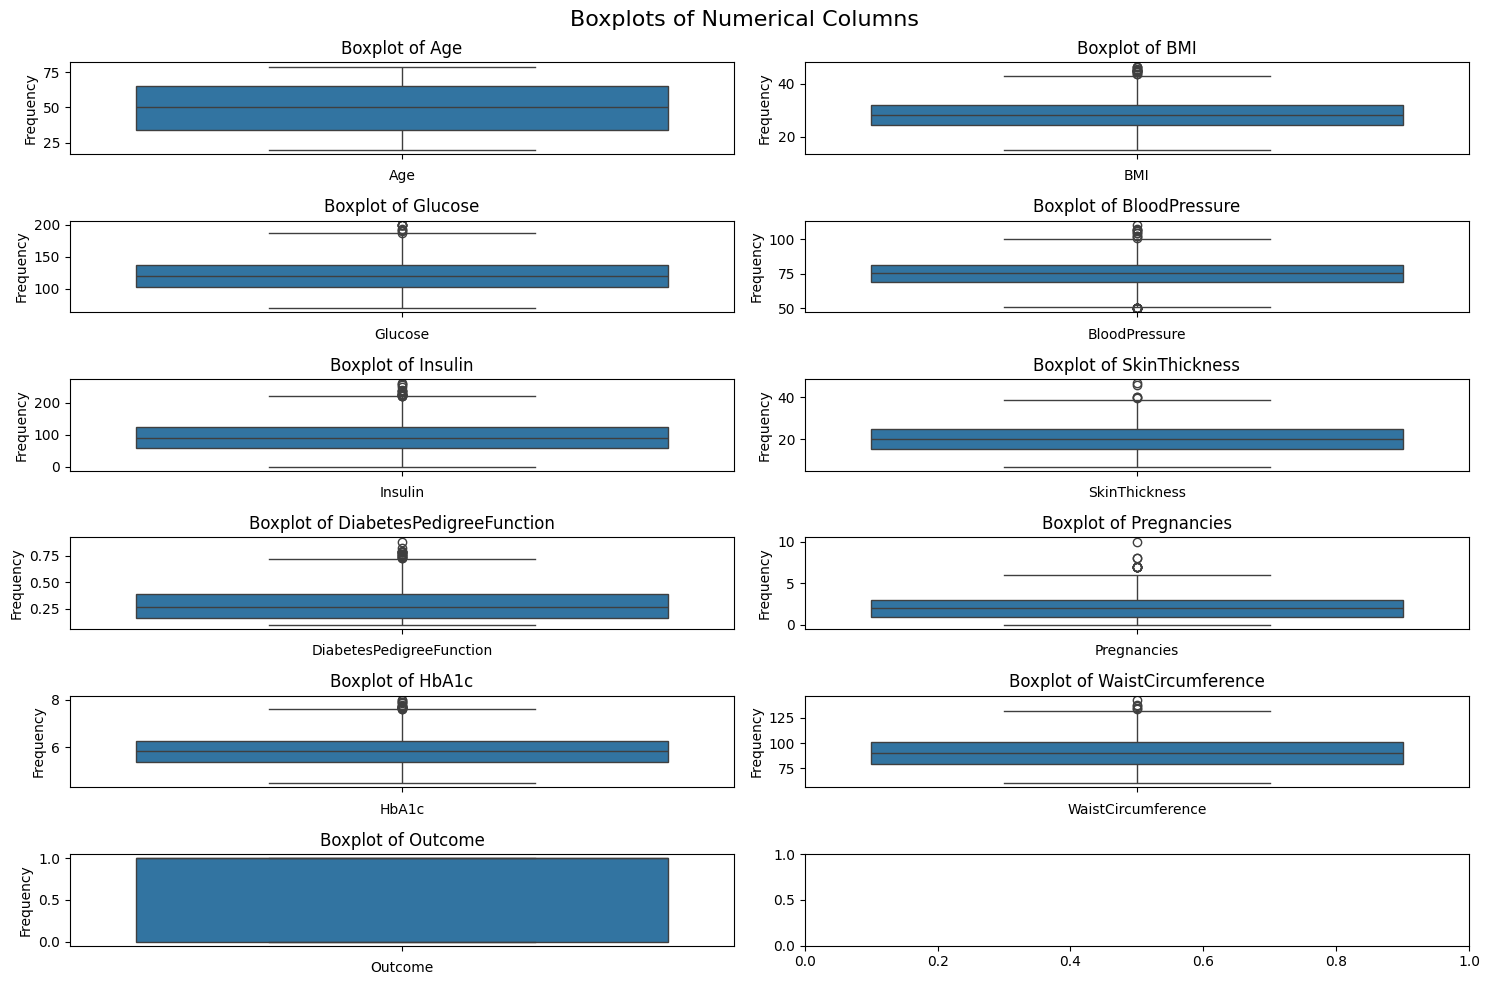

In [ ]:
fig, axes = plt.subplots(nrows = (len(num_cols) + 1)//2, ncols = 2, figsize=(15, 10))
ax = axes.flatten()
plt.suptitle("Boxplots of Numerical Columns", fontsize=16)

for i, col in enumerate(num_cols):
    sns.boxplot(df[col], ax = ax[i], orient = "v")
    ax[i].set_title(f"Boxplot of {col}")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
### Removing outliers

In [ ]:
columns_to_check = ['BMI', 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness','DiabetesPedigreeFunction', 'Pregnancies', 'HbA1c','WaistCircumference']

In [ ]:
df_new = df.copy()

In [ ]:
for col in columns_to_check:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_new = df_new[(df_new[col] >= lower_bound) & (df_new[col] <= upper_bound)]

print(df.shape)
print(df_new.shape)

(2500, 16)
(2495, 16)


### DATA PREPROCESSING

In [ ]:
df_new.columns

Index(['Age', 'BMI', 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness',
       'DiabetesPedigreeFunction', 'Pregnancies', 'HbA1c',
       'WaistCircumference', 'PhysicalActivityLevel', 'SmokingStatus',
       'AlcoholConsumption', 'DietQuality', 'FamilyHistoryOfDiabetes',
       'Outcome'],
      dtype='object')

In [ ]:
## Categorizing numerical and categorical columns:
num_cols = ['Age', 'BMI', 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness','DiabetesPedigreeFunction', 'Pregnancies', 'HbA1c','WaistCircumference']
cat_cols = ['PhysicalActivityLevel', 'SmokingStatus','AlcoholConsumption', 'DietQuality', 'FamilyHistoryOfDiabetes']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore", drop = "first")

In [ ]:
for i in num_cols:
  df_new[i] = scaler.fit_transform(df_new[[i]])

for i in cat_cols:
  df_new[i] = encoder.fit_transform(df_new[[i]])

In [ ]:
# Column Transformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols),
        ('cat', encoder, cat_cols),
    ]
)

In [ ]:
df_new.head()

,Age,BMI,Glucose,BloodPressure,Insulin,SkinThickness,DiabetesPedigreeFunction,Pregnancies,HbA1c,WaistCircumference,PhysicalActivityLevel,SmokingStatus,AlcoholConsumption,DietQuality,FamilyHistoryOfDiabetes,Outcome
0,-1.643494,-0.177591,-0.223300,-0.321485,1.570466,-0.816034,0.355370,1.432004,-1.867554,-0.192160,1.0,1.0,0.0,0.0,0.0,0
1,1.675604,0.010662,0.460430,-0.120166,0.547311,-1.267074,0.178900,0.024539,-0.333915,0.475937,0.0,0.0,1.0,1.0,1.0,1
2,0.531088,0.490715,-2.096995,0.337414,-1.770724,-0.170659,-1.251141,0.024539,1.584704,0.602228,0.0,0.0,0.0,1.0,1.0,1
4,-0.270074,-0.149341,-0.318779,0.478829,-0.344385,-1.801014,-0.986850,0.728272,1.092916,0.696958,0.0,0.0,0.0,0.0,1.0,1
5,0.016055,0.003976,-0.595849,-0.010228,-0.093721,-0.388254,0.025522,-0.679194,-1.389074,0.090668,1.0,1.0,0.0,0.0,1.0,0


In [ ]:
label = df_new['Outcome']
features = df_new.drop('Outcome', axis = 1)

In [ ]:
y_train.value_counts()

,count
Outcome,
1,1295
0,701


In [ ]:
X_train.value_counts()

Age        BMI        Glucose    BloodPressure  Insulin    SkinThickness  DiabetesPedigreeFunction  Pregnancies  HbA1c      WaistCircumference  PhysicalActivityLevel  SmokingStatus  AlcoholConsumption  DietQuality  FamilyHistoryOfDiabetes
 1.675604   2.050312   0.020856   0.907811      -0.963037   0.428515       0.909194                  0.024539    -1.116466   1.059237           1.0                    0.0            0.0                 0.0          1.0                        1
-1.700720  -2.250691   0.293597   1.622496      -1.280666  -0.164854       1.578864                  1.432004     0.473731   0.589594           0.0                    0.0            0.0                 0.0          1.0                        1
           -1.860264   1.038994   0.485984      -0.115550   0.947629       1.177082                 -0.679194    -0.332738  -0.213792           1.0                    0.0            0.0                 0.0          0.0                        1
           -1.799578  -0.184768  -0.001116      -0.416968   0.763046       1.528074                  0.728272    -1.713954  -0.281048           1.0                    0.0            1.0                 0.0          0.0                        1
           -1.753258  -0.168927  -0.079365      -0.500305   1.835905       1.155158                  1.432004    -0.262047   0.086842           0.0                    0.0            0.0                 0.0          1.0                        1
                                                                                                                                                                                                                                                 ..
           -0.307393  -1.112331  -0.192468      -1.680841  -0.167263       0.516182                 -0.679194    -0.729804  -0.919014           0.0                    0.0            0.0                 0.0          1.0                        1
           -0.328156   0.487497  -1.148473       1.459259  -0.425007      -1.251141                  0.024539     0.228647   1.715417           0.0                    0.0            0.0                 0.0          1.0                        1
           -0.366638  -0.069111   0.320545      -0.205366   1.820605      -0.756025                 -0.679194     1.412482  -1.018284           0.0                    0.0            0.0                 0.0          0.0                        1
           -0.421665   1.495441  -2.289976       1.274653   0.896838      -0.335464                 -0.679194    -0.446650  -0.327138           0.0                    0.0            0.0                 0.0          0.0                        1
           -0.442307  -0.634987   1.263362       1.361204   0.087807       1.085173                  0.728272    -1.101304   0.016143           0.0                    1.0            0.0                 0.0          1.0                        1
Name: count, Length: 1996, dtype: int64

In [ ]:
# Correcting class imbalance
import imblearn
from imblearn.over_sampling import RandomOverSampler

X_ros, y_ros = RandomOverSampler(random_state=42).fit_resample(features, label)
print(X_ros.shape, y_ros.shape)
print(y_ros.value_counts())

(3210, 15) (3210,)
Outcome
0    1605
1    1605
Name: count, dtype: int64


In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# x-train = example question------- y_train = example answer
# x_test = classwork question------ pred = student(model) answer------- y_test = classwork answer

### CLASSIFICATION

In [ ]:
# Importing Models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression

In [ ]:
# Initializing Model
lr = LogisticRegression()

# Train your model(student)
lr.fit(X_train, y_train)

# Make predictions
l_pred = lr.predict(X_test)

# Evaluate the model(Mark their test)
print(f"Training score: {lr.score(X_train, y_train)}")
print(f"Accuracy score: {accuracy_score(y_test, l_pred)}")

Training score: 0.8386773547094188
Accuracy score: 0.7935871743486974


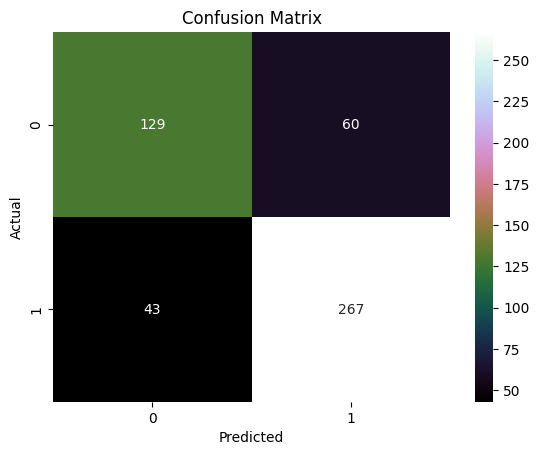

In [ ]:
Lr_cm = confusion_matrix(y_test, l_pred)
sns.heatmap(Lr_cm, annot=True, fmt='d', cmap='cubehelix', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Building and Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


### RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
r_pred = rf.predict(X_test)

print(f"Training score: {rf.score(X_train, y_train)}")
print(f"Accuracy score: {accuracy_score(y_test, r_pred)}")

Training score: 1.0
Accuracy score: 0.8637274549098196


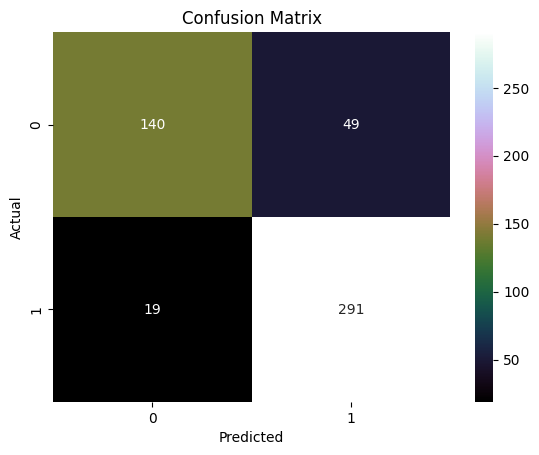

In [ ]:
rf_cm = confusion_matrix(y_test, r_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='cubehelix', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### DecisionTreeClassifier

Training score: 1.0
Accuracy score: 0.8016032064128257


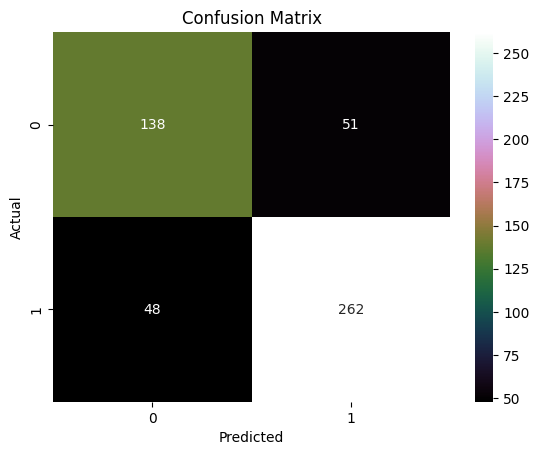

In [ ]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
d_pred = dt.predict(X_test)

print(f"Training score: {dt.score(X_train, y_train)}")
print(f"Accuracy score: {accuracy_score(y_test, d_pred)}")

dt_cm = confusion_matrix(y_test, d_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='cubehelix', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()